In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-catsvsdogs-dataset/readme[1].txt
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7981.jpg
/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/7981.jpg


# Prepare Input

In [5]:
import os
xx = os.listdir('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog')
for idx, im in enumerate(xx):
    print(xx[idx])
    break

7981.jpg


In [46]:
from torch.utils.data import DataLoader, Dataset
from PIL import Image
class DogvsCat(Dataset):
    def __init__(self,root_dir, set_size, transform=None ):
        self.root_dir = root_dir
        self.set_size = set_size
        self.transform = transform
        self.cat_and_dog_list = []
        self.len = 0
    
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        dog = os.path.join(root_dir, 'Dog')
        dog_dir = os.listdir(dog)
        cat = os.path.join(root_dir, 'Cat')
        cat_dir = os.listdir(cat)
        for i, (x, y) in enumerate(zip(dog_dir, cat_dir)):
            self.cat_and_dog_list.append(dog_dir[i])
            self.cat_and_dog_list.append(cat_dir[i])
        
        
        self.len = len(self.cat_and_dog_list)  
        dog_dir.clear()
        cat_dir.clear()
        
        if idx % 2 == 0:
            img = Image.open(os.path.join(dog, self.cat_and_dog_list[idx]))
            label = 0
        else:
            img = Image.open(os.path.join(cat, self.cat_and_dog_list[idx]))
            label = 1
            
        if self.transform:
            return self.transform(img), label
        
        return img, label
        

In [47]:
import torchvision.transforms as transforms

root_dir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/'
set_size = 10
transform_to_tensor = transforms.Compose([transforms.PILToTensor(), transforms.Resize((244, 244))])

t_d = DogvsCat(root_dir, set_size, transform_to_tensor)

In [60]:
train_data = DataLoader(t_d, batch_size=8, shuffle=False, num_workers=0)

In [61]:
next(iter(train_data))[1]

tensor([0, 1, 0, 1, 0, 1, 0, 1])

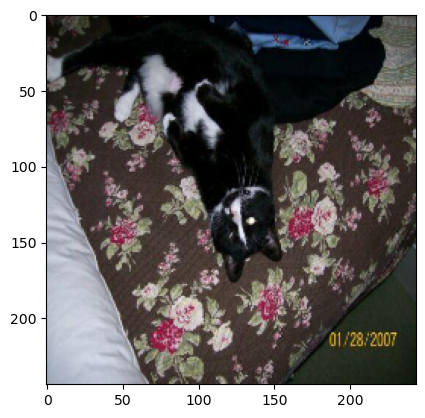

In [49]:
import matplotlib.pyplot as plt
plt.imshow(t_d[2001][0].permute(1,2,0))

In [40]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Label 0-->Dog 1-->Cat
labels = []

# All images in tensor form will be saved to this list
image_data = []
import matplotlib.pyplot as plt

def images():
    for dirname, _, filenames in os.walk('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat'):
        cat_images = filenames
    for dirname, _, filenames in os.walk('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog'):
        dog_images = filenames
        
    
    return cat_images, dog_images

cat_images, dog_images = images()                        

In [50]:
print(len(cat_images), len(dog_images))

12499 12499


In [2]:
def get_input():
    transform_to_tensor = transforms.Compose([transforms.PILToTensor(), transforms.Resize((244, 244)), transforms.Grayscale(num_output_channels=1)])
    
    for dirname, _, filenames in os.walk('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/'):
        for filename in filenames:
            try:
                # Read image from the storage
                image = Image.open(os.path.join(dirname, filename))
                
                # Convert the image to tensor and Resize 
                img = transform_to_tensor(image)

                # Change dtype to float 32
                img = img.to(torch.float32)

                # Normalize image value to lie in range [0-1]
                img /= 255

                # Append the image to the image data
                image_data.append(img)
                
                # Create labels 0--> Dog 1--> Cat
                labels.append(0 if dirname=="/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog" else 1)
            except Exception as e:
                print(e)

In [51]:
def prepear_input(base_path, img_names):
    
    for idx, img_name in enumerate(img_names):
        try:
            with Image.open(os.path.join(base_path, img_name)) as img:
                img.verify()
                img_names[idx] = os.path.join(base_path, img_name)
        except Exception as e:
            print(e)
            del img_names[idx]
        
    print(len(img_names))
    
prepear_input("/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat", cat_images)
prepear_input("/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog", dog_images)

12499
12499


In [54]:
print(cat_images[0])

/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/7981.jpg


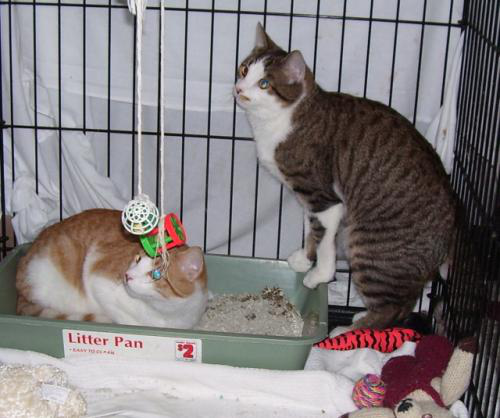

In [56]:
Image.open('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/7981.jpg')

In [57]:
print(len(cat_images), len(dog_images))

12499 12499


In [65]:
import numpy as np
def dataloader( dog_images, cat_images, size, train ):
    transform_to_tensor = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.PILToTensor(), transforms.Resize((100, 100))]) 
    if train:
        train_dataloader = []
        for idx in range(int(size/2)):
            try:
                dog = Image.open(dog_images[idx])
                cat = Image.open(cat_images[idx])

                train_dataloader.append([transform_to_tensor(dog), 0])
                train_dataloader.append([transform_to_tensor(cat), 1])
            except Exception as e:
                pass
    else:
        train_dataloader = []
        for idx in range(int(size/2)):
            try:
                dog = Image.open(dog_images[idx+size])
                cat = Image.open(cat_images[idx+size])

                train_dataloader.append([transform_to_tensor(dog), 0])
                train_dataloader.append([transform_to_tensor(cat), 1])
            except Exception as e:
                print(e)
        
            
    return train_dataloader



In [62]:
train_dataloader = dataloader(dog_images, cat_images, size=20000, train=True)

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [66]:
test_dataloader = dataloader(dog_images, cat_images, size = len(cat_images)+len(dog_images)-20000, train=False)

In [67]:
len(test_dataloader)

4998

In [40]:
print(len(train_dataloader), len(test_dataloader))

20000 4998


In [73]:
type(test_dataloader[0][0])
test_dataloader[0][0].shape

torch.Size([1, 100, 100])

In [74]:
for i in range(len(test_dataloader)):
    if not test_dataloader[i][0].shape == (1, 100, 100):
        print(i)

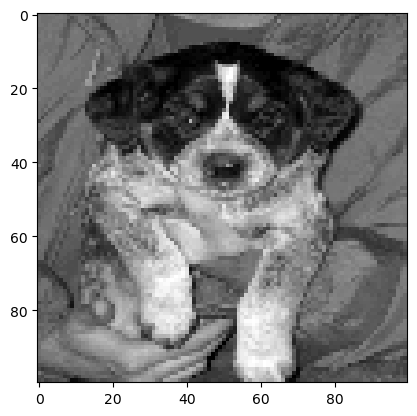

In [75]:
plt.imshow(test_dataloader[166][0].permute(1,2,0), cmap='gray')

In [ ]:
print(test_dataloader[0:32])

In [ ]:
def make_batches(dataloader, batch_size):
    final_list = []
    for i in range(0, len(dataloader), batch_size):
        batch_data = []
        batch_labels = []
        for j in range(i, min(i+batch_size, len(dataloader))):
            batch_data.append(dataloader[j,:])
        final_list.append([torch.cat([x[0].unsqueeze(dim=0) for x in batch_data]), to[x[1] for x in batch_data]])
               
    return final_list


final_list = make_batches(test_dataloader, 32)

In [93]:
len(final_list)

4967

In [91]:
def dataloader_fun(data, labels, batch_size=64, train=False):
    final_list = []
    if data.shape[0] == len(labels):
        for i in range(0, data.shape[0], batch_size):
            batch_data = []
            batch_labels = []
            for j in range(i, min(i+batch_size, data.shape[0])):
                image_data = torch.tensor([im for im in data.iloc[j,:]], dtype=torch.float).reshape(28,28)
                if train==True:
                    transformed_image = train_transform(image_data.unsqueeze(dim=0)).squeeze()
                    batch_data.append(transformed_image)
                else:
                    batch_data.append(image_data.clone().detach())
                batch_labels.append(torch.tensor(labels.iloc[j]))
            # yield torch.tensor(batch_data), batch_labels   
            final_list.append([torch.cat([x.unsqueeze(0) for x in batch_data]), torch.tensor(batch_labels)])
    return final_list

final_ls = dataloader_fun(test_dataloader, test_dataloader)

In [89]:
print(len(test_dataloader), len(final_list))
final_list[0][1]

4998 4967


[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1]

In [87]:
4998/32

156.1875

In [20]:
test_dataloader[0][0].unsqueeze(dim=0).shape

torch.Size([1, 3, 28, 28])

0


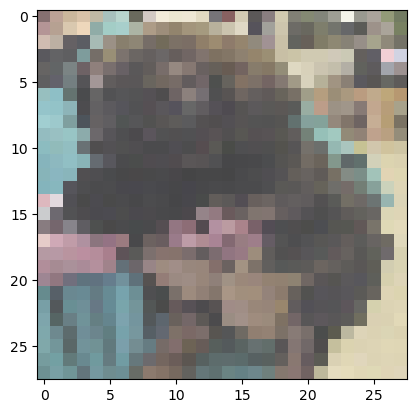

In [18]:
test_dataloader[0][0].shape
import matplotlib.pyplot as plt

plt.imshow(test_dataloader[2][0].permute(1,2,0))
print(test_dataloader[2][1])

In [60]:
xxx = torch.cat([x.unsqueeze(dim=0) for x, _ in test_dataloader[:64]])
xxx.shape

torch.Size([64, 3, 28, 28])

In [53]:
del xxx

NameError: name 'xxx' is not defined

In [ ]:
get_input()


In [ ]:
def describe_data():
    print(f"The size of dataset is {len(image_data)}, {len(labels)}")
    print(f"Shape of the image is {image_data[0].shape}")
    
    cat_count, dog_count =0, 0
    for i in labels:
        if i == 0:
            dog_count += 1
        else:
            cat_count += 1
            
    print(f"The number of cats are {cat_count} and dogs are {dog_count}")
    print(f"Start index of cats is {dog_count} and end index of dogs is {dog_count-1}")

In [ ]:
describe_data()

In [ ]:
# Save the data to avoid rerunning it
torch.save(image_data, 'image_data.pt')

In [ ]:
xxx = torch.cat([x.unsqueeze(dim=0) for x in image_data[:64]])
xxx.shape

In [ ]:
train_dataset = []
import math
def train_loader(batch_size=32, train_size=20000):
    num_of_batches = math.floor(train_size/batch_size)
    print(f"Number of batches are {num_of_batches}, number of images are {num_of_batches*32}")
    for i in range(math.floor(num_of_batches/2)):
        train_dataset.append([torch.cat([x.unsqueeze(dim=0) for x in image_data[i:batch_size+i]]),
                              torch.tensor(labels[i:batch_size+i])])
    for i in range(math.floor(num_of_batches/2)):
        train_dataset.append([torch.cat([x.unsqueeze(dim=0) for x in image_data[12499+i:12499+batch_size+i]]),
                              torch.tensor(labels[12499+i:12499+batch_size+i])])

In [ ]:
train_dataset[]

In [ ]:
train_loader()

In [ ]:
import matplotlib.pyplot as plt
label = {0:"Dog", 1:"Cat"}
plt.imshow(image_data[12499].permute(1,2,0))
plt.title(label[labels[12500]])

In [ ]:
len(image_data)*0.8